In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# first class

np.seed = 7
train_data = np.random.normal(size=(100,2)) #массив 2 столбца 100 рандомных чисел
train_labels = np.zeros(100) #массив из 100 нулей

#add second class
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)] #добавляется второй массив, аналогичный 1-му
train_labels = np.r_[train_labels, np.ones(100)] #добавляется массив из 100 единиц

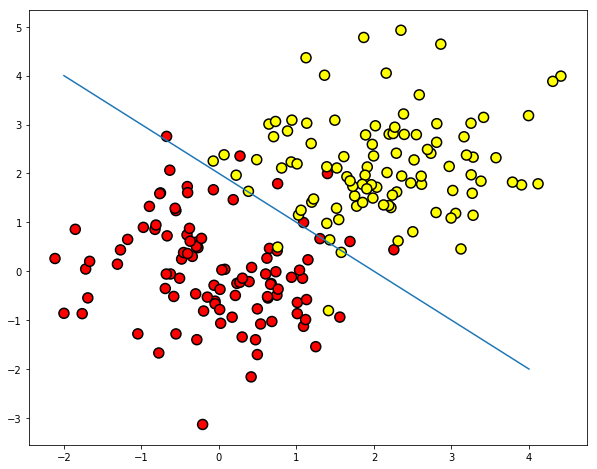

In [3]:
plt.rcParams['figure.figsize']=(10,8)
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, 
            s=100, cmap='autumn', edgecolors = 'black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1))

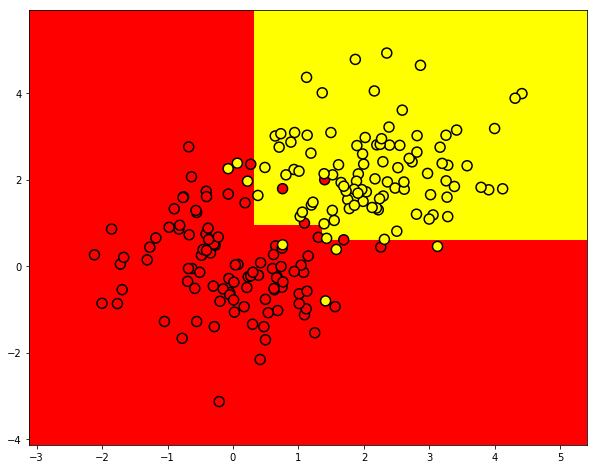

In [4]:
#обучение дерева решений 

from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.

def get_grid(data):
    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17) # 3 - глубина дерева

# обучаем дерево

clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100,
            cmap='autumn', edgecolors = 'black', linewidth=1.5)


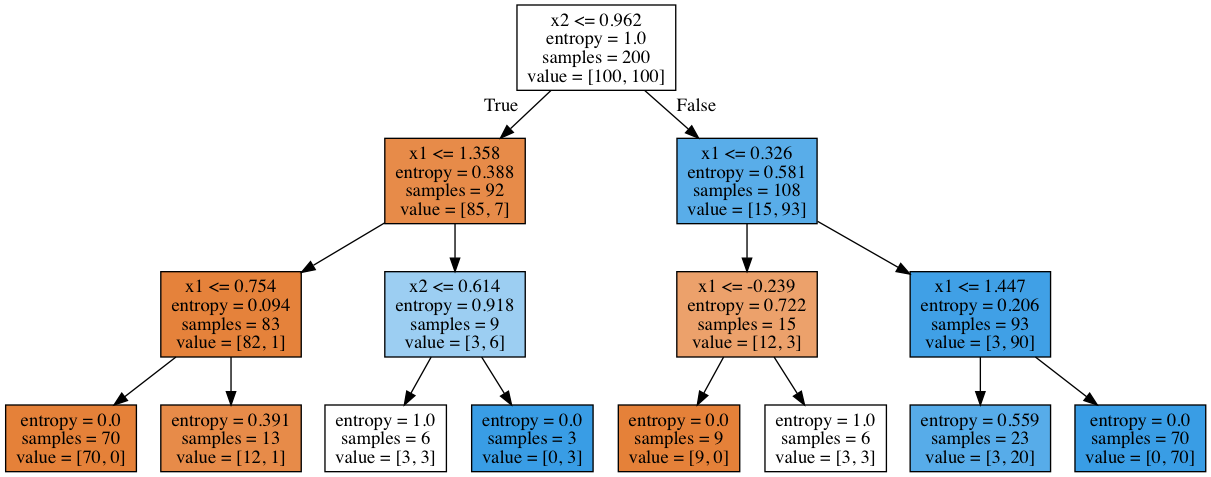

In [5]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

dot_data = export_graphviz(clf_tree, feature_names=['x1','x2'], out_file=None, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [6]:
# Чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов 
# второго класса, тем ближе цвет к темно-синему. В начале объектов одного класса поровну, поэтому корневая 
# вершина дерева – белого цвета.

In [7]:
# Сгенерируем данные, распределенные вокруг функции (см. статью на хабре) c некоторым шумом, обучим на них 
# дерево решений и изобразим, какие прогнозы делает дерево.

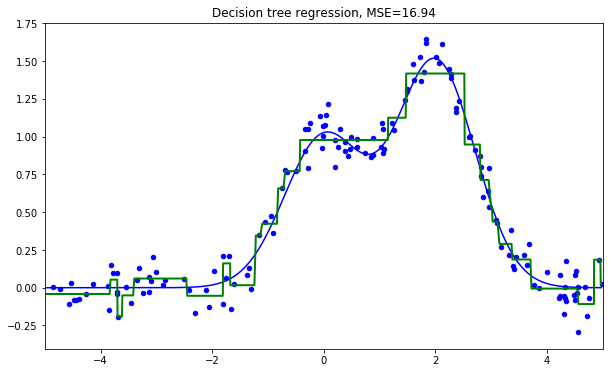

In [8]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(- (x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X,y

X_train, y_train = generate(n_samples = n_train, noise=noise)
X_test, y_test = generate(n_samples = n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10,6))  # размер изображения 10х6 дюймов
plt.plot(X_test, f(X_test), "b") # график функции f() синего цвета
plt.scatter(X_train, y_train, c="b", s=20) # график тренировочной функции синего цвета, s - размер кругов
plt.plot(X_test, reg_tree_pred, "g", lw=2) #график прогноза зеленого цвета с шириной линии 2 мм(?)
plt.xlim([-5,5]) # границы по оси Х
plt.title("Decision tree regression, MSE=%.2f" %np.sum((y_test - reg_tree_pred)**2))
plt.show()

In [9]:
# Деревья решений и метод ближайших соседей в задаче прогнозирования оттока клиентов телеком-оператора

df = pd.read_csv('telecom_churn.csv')
df['International plan'] = pd.factorize(df['International plan'])[0] # преобразует булевые нечисленные значения в числа
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [10]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [11]:
# Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). 
# Обучим 2 модели – дерево решений и kNN, пока не знаем, какие параметры хороши, поэтому наугад: 
# глубину дерева берем 5, число ближайших соседей – 10.

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [12]:
#Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов. 
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred.round())

0.94

In [13]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred.round())

0.881

In [14]:
# Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное 
# используемое на каждом разбиении число признаков. Суть того, как работает GridSearchCV: для каждой уникальной 
# пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее 
# сочетание параметров.

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score


In [16]:
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [17]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [18]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [19]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [20]:
tree_grid.best_score_ 

0.9425632233176168

In [21]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout).round())

0.946

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [24]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [25]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [26]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [27]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859837119588513)

In [28]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

In [29]:
# обучение и настройка случайного леса

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.9494233119813256


In [30]:
forest_params ={'max_depth': range(1,11), 'max_features': range(4,19)}

In [31]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [32]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [33]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [34]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

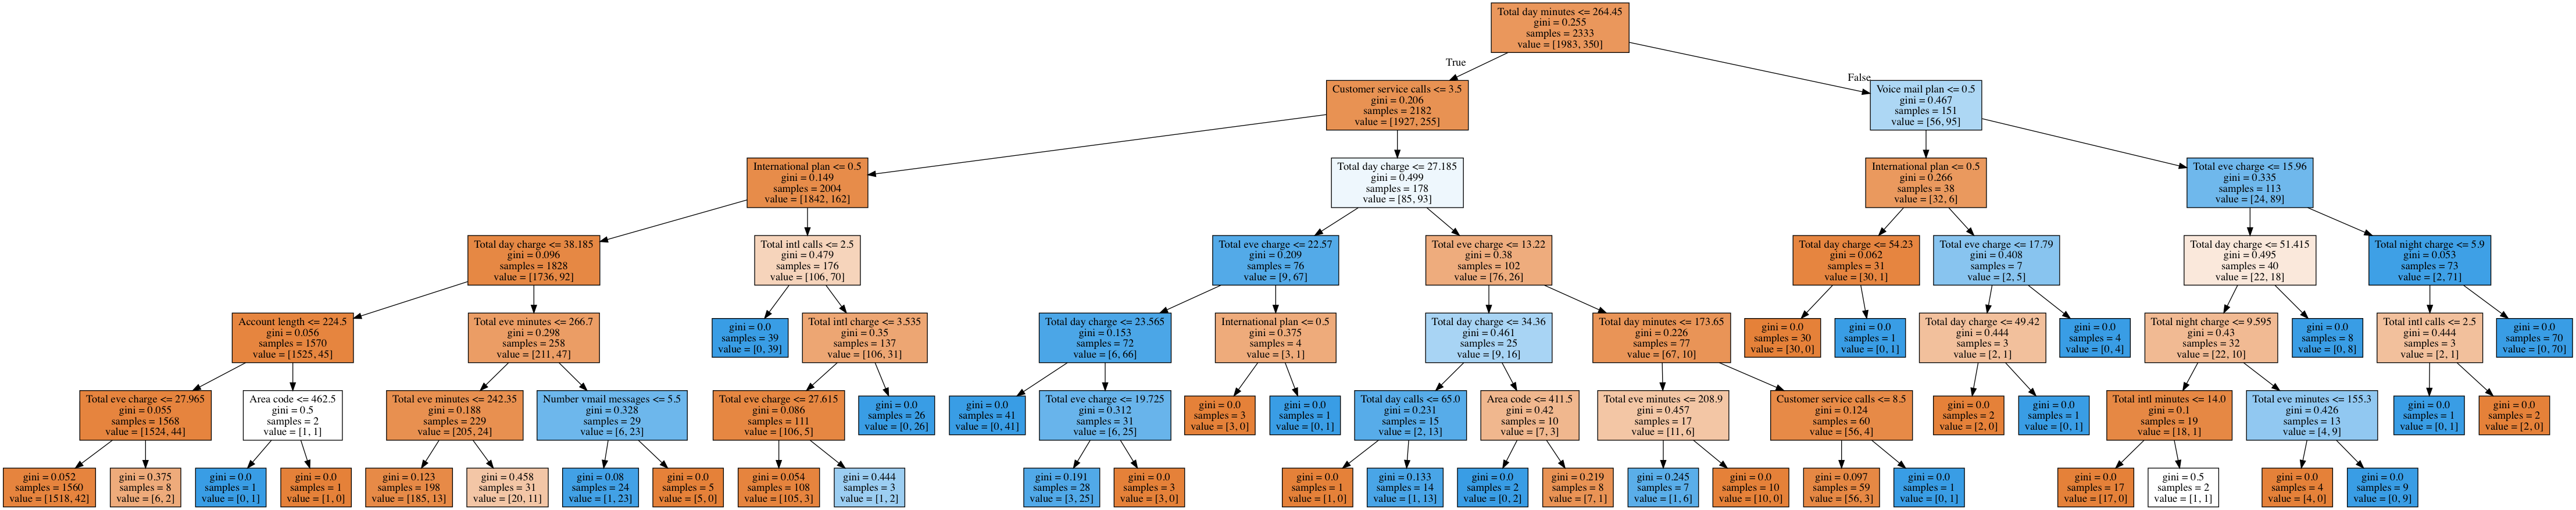

In [35]:
dot_data = export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, out_file=None, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [36]:
# Сложный случай для деревьев решений

#В продолжение обсуждения плюсов и минусов обсуждаемых методов приведем очень простой пример задачи классификации,
#с которым дерево справляется, но делает все как-то "сложнее", чем хотелось бы. Создадим множество точек на 
#плоскости (2 признака), каждая точка будет относиться к одному из классов (+1, красные, или -1 – желтые). 
#Если смотреть на это как на задачу классификации, то вроде все очень просто – классы разделяются прямой.

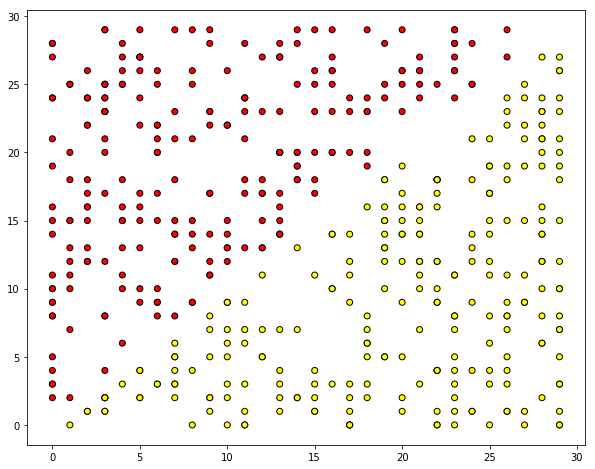

In [37]:
def form_linerly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target =[], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        
        if np.abs(x1-x2) > 0.5:
            data.append([x1,x2])
            target.append(np.sign(x1-x2))
    return np.array(data), np.array(target)

X, y =form_linerly_separable_data()
plt.scatter(X[:,0], X[:,1], c =y, cmap='autumn', edgecolors='black');

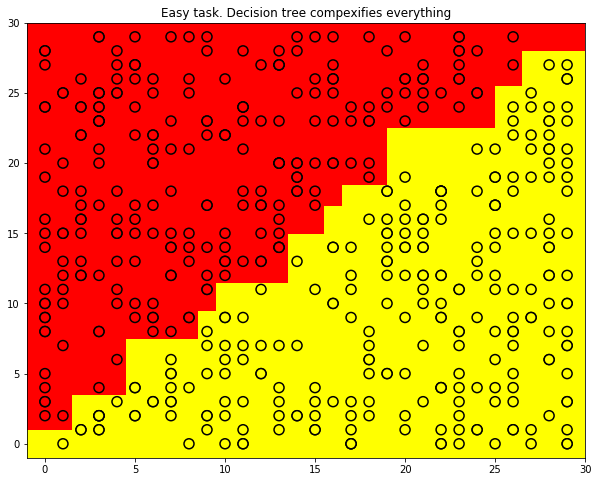

In [38]:
# дерево решений строит сложную границу и само по себе оказывается глубоким. 

tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

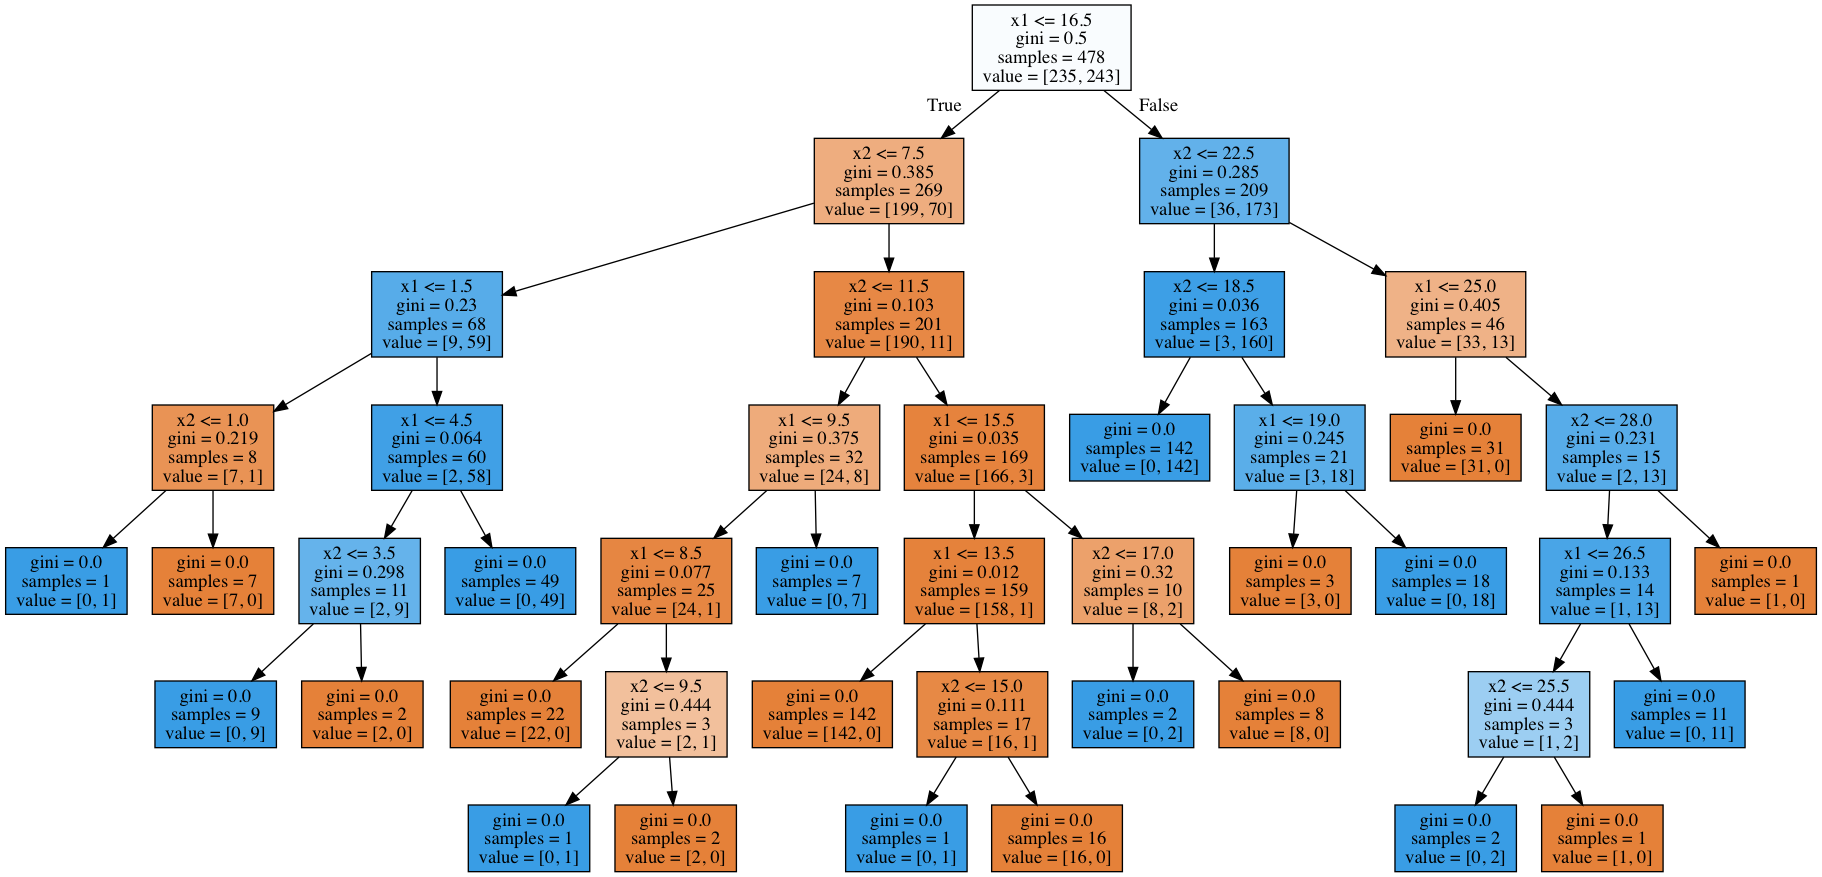

In [39]:
dot_data = export_graphviz(tree, feature_names=['x1','x2'], out_file=None, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [40]:
# Метод одного ближайшего соседа здесь справляется вроде лучше дерева, но все же не так хорошо, 
#как линейный классификатор (наша следующая тема).

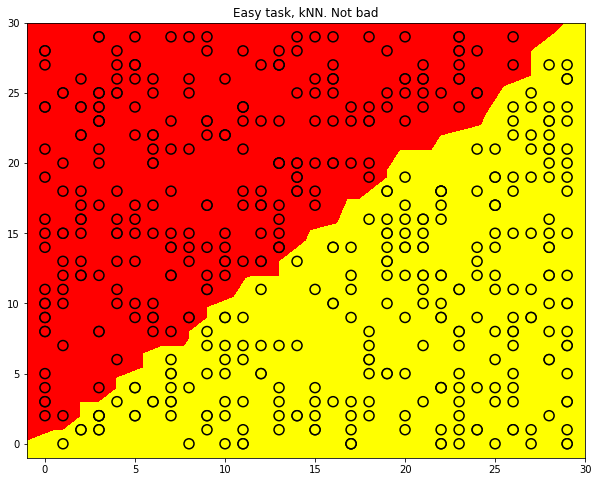

In [41]:
knn=KNeighborsClassifier(n_neighbors=1).fit(X,y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task, kNN. Not bad');

In [55]:
#Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

#Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта 
#матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

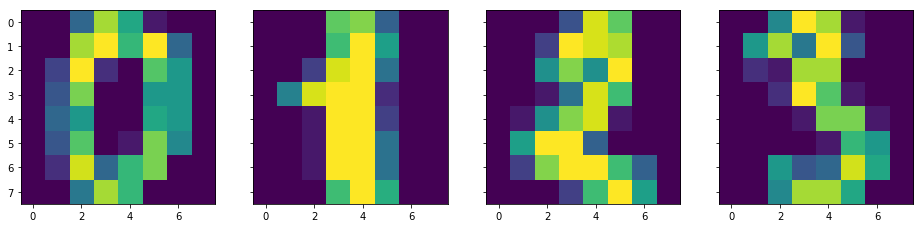

In [44]:
f, axes = plt.subplots(1,4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8,8]));

In [59]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

In [60]:
#Обучим дерево решений и kNN, опять параметры пока наугад берем.

tree=DecisionTreeClassifier(max_depth=5, random_state=17)
knn=KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [62]:
#Теперь так же, как раньше настроим параметры моделей на кросс-валидации, 
#только учтем, что признаков сейчас больше, чем в прошлой задаче — 64.

tree_params={'max_depht':[1,2,3,5,10,20,25,30,40,50,64], 'max_features':[1,2,3,5,10,20,25,30,40,50,64]}
tree_gird=GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [63]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 9, 'max_features': 11}, 0.8297533810660302)

In [64]:
#Это уже не 66%, но и не 97%. Метод ближайших соседей на этом наборе данных работает лучше. 
#В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9865458422397149

In [65]:
#Обучим на этих же данных случайный лес, он на большинстве выборок работает лучше, чем метод ближайших соседей. 
#Но сейчас у нас исключение.

np.mean(cross_val_score(DecisionTreeClassifier(random_state=17), X_train, y_train, cv=5))

0.8442508528266807

In [67]:
#Сложный случай для метода ближайших соседей

def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed=random_seed
    y = np.random.choice([-1,1], size=n_obj)
    # первый признак пропорционален целевому
    x1=0.3*y
    # остальные признаки – шум
    x_other = np.random.random(size=[n_obj,n_feat-1])
    return np.hstack([x1.reshape([n_obj,1]), x_other]), y

X,y = form_noisy_data()

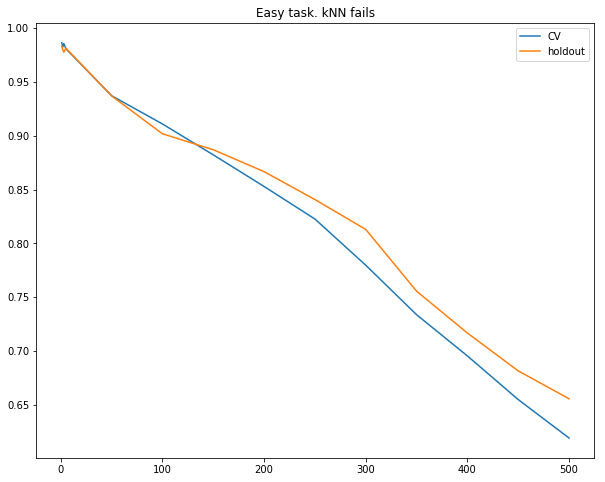

In [69]:
from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [71]:
#Обучение дерева

tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 0.2021397996460202, holdout: 0.17777777777777778
